# Introduction to Pandas
The [pandas](https://pandas.pydata.org/) library is a framework for data processing and analysis in Python. It provides convenient data structures for representing series and tables of data, and makes it easy to transform, split, merge, and convert data.

Features for handling data:
- labeled indexing
- hierarchical indices
- alignment of data for comparison and merging of datasets
- handling of missing data

and much more.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Pandas Data Structures
The two main data structures in pandas are the Series (used to represent data series) and DataFrame objects (used to represent tabular data). Both of these objects have an index for accessing elements or rows in the data represented by the object.  (Note: There are actually 3 data structues but the third type(Panel) is barely used in the real world.)


|Data Structure|Dimensionality| Spreadsheet Analog |
| --- | --- | --- |
|```Series```|1D |Column | 
|```DataFrame```|2D |Single sheet (tabular data) |
|```Panel```|3D |Multiple sheets |




### Series
We will show the advantage of being able to index a data series with labels rather than integers with the following example. Let's create a ```Series``` object that represents the data [909976, 8615246, 2872086, 2273305].

In [104]:
s = pd.Series([909976, 8615246, 2872086, 2273305])

If you type s or ```print(s)```, you will see the data of the Series with the corresponding indices. The object is a ```Series``` instance with data type int64.
* Mixed data types are permissible, but then the data type will be object, not a uniform numeric type, which we will see below can limit utility.

In [105]:
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [106]:
list_s =  [909976, 8615246, 2872086, 2273305]
list_s

[909976, 8615246, 2872086, 2273305]

You can access elements in the Series just like a list

In [107]:
print(s[1], list_s[1])

8615246 8615246


But a Series has a more general concept of index.  A Python list can only use integeger indexes.  A Pandas series can also be indexed by other values, similar to a Python dictionary (associative array).

Using ```index``` and ```values``` attributes, we can extract the index and the values stored in the ```Series```:
* The default index is a range of integers, just like a list

In [108]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [109]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

Using integers as indices is not descriptive. For example, if the data represents the population of four European capitals, it's convenient and descriptive to use city names as indices. 

In [110]:
s.index = ["Stockholm", "London", "Rome", "Paris"]

#we can also set the name attribute to the Series
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

We can also do it all once:

In [112]:
s = pd.Series([909976, 8615246, 2872086, 2273305], 
              name = "Population", 
              index = ["Stockholm", "London", "Rome", "Paris"])
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [ ]:
?pd.Series

We can now access elements in a Series by indexing with either the name or the index:

In [111]:
s["Stockholm"]

909976

In [114]:
#s[0]  # Do not use this syntax, it is not recommended

In [115]:
s.iloc[0]

909976

or through an attribute with the same name as the index:

In [116]:
s.Stockholm

909976

Series are mutable (elements can be directly assigned to)

In [117]:
s.iloc[0] = 1
s

Stockholm          1
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [120]:
s.iloc[0] = 99
s

Stockholm         99
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [121]:
s["Stockholm"] = 909976 # restore the original value
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

Indexing a Series object with a list of indices gives a new Series object which is a subset of the original one.

In [122]:
s2 = s[["London", "Paris"]]
s2

London    8615246
Paris     2273305
Name: Population, dtype: int64

In [123]:
s2["London"] = 99
s2

London         99
Paris     2273305
Name: Population, dtype: int64

In [124]:
s # Note that s was not changed ... i.e., s2 is a new series

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

We can easily compute the statistics of a `Series` object:

In [125]:
 #the number of data points
s.count()

4

In [126]:
# mean and standard deviation
s.mean(), s.std()

(3667653.25, 3399048.5005155364)

In [127]:
# min and max
s.min(), s.max()

(909976, 8615246)

In [128]:
# 25% quantile
s.quantile(q=0.25)

1932472.75

The `describe` method gives a summary of a `Series` object:

In [129]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

We can use `plot` method to visualize the data.


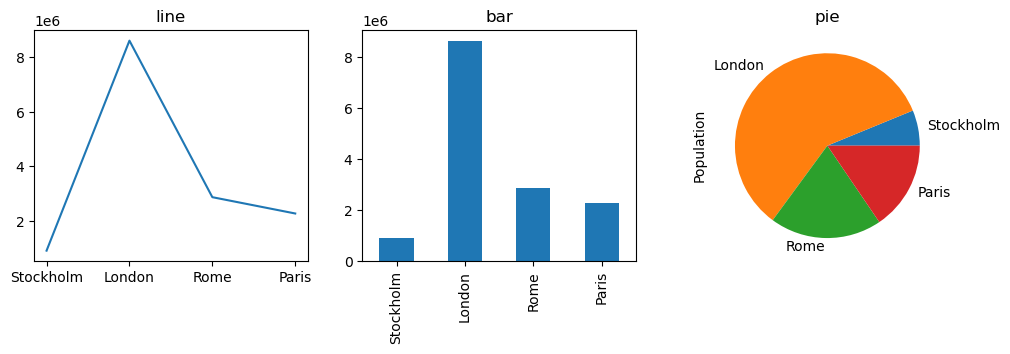

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
s.plot(ax = axes[0], kind='line', title = 'line')
s.plot(ax = axes[1], kind='bar', title = 'bar')
s.plot(ax = axes[2], kind='pie', title = 'pie')
plt.show()

### DataFrame
`DataFrame` object is the pandas data structure for two-dimensional arrays. Columns are really just `Series` objects.  
There are various ways to initialize a `DataFrame`.  For example, we will extend the previous dataset by including a column that specifies which country each city belongs to.

In [ ]:
?pd.DataFrame

In [131]:
df = pd.DataFrame(
    [
        [909976, "Sweden"],
        [8615246, "United Kingdom"],
        [2872086, "Italy"],
        [2273305, "France"],
    ],
    index=["Stockholm", "London", "Rome", "Paris"],
    columns=["Population", "State"],
)
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


Another way which can be more convenient is to pass a dictionary with column titles as keys and column data as values:

In [143]:
pops = [909976, 8615246, 2872086, 2273305]
df2 = pd.DataFrame(
    {"Population": pops, "State": ["Sweden", "United Kingdom", "Italy", "France"]},
    index=["Stockholm", "London", "Rome", "Paris"],
)
df2

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


Each column can be accessed using the column name as attribute (or by indexing with the column label). The result is a new `Series` object.

In [136]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [137]:
df["Population"] #another way to get column

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

Rows can be accessed using the `loc` for label based indexing or `iloc` for positional (integer) indexing. 

In [138]:
df.loc["London"]

Population           8615246
State         United Kingdom
Name: London, dtype: object

In [139]:
df.iloc[1]  # London is the row with integer index 1 (i.e., the second row)

Population           8615246
State         United Kingdom
Name: London, dtype: object

In [141]:
# df["Population"]["Stockholm"] # Only write this when reading data!  Better, don't do it at all

Use `loc` or `iloc` and avoid [chained indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) (and also [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-view-versus-copy)) especially when modifying data. 

In [144]:
# df["Population"]["Stockholm"] = 1 # INCORRECT chained indexing when changing data
# df

In [145]:
df.loc["Stockholm","Population"] = 909976 # restore correct value in the correct manner
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


We can pass a list of row labels (and/or column labels) which will give us a new `DataFrame` that is a subset of the original `DataFrame`:

In [151]:
df3 = df.loc[["London","Paris"],:]
df3

,Population,State
London,8615246,United Kingdom
Paris,2273305,France


In [153]:
df3.loc["London","Population"] = 99
df.loc["London","Population"]

8615246

In [154]:
df3.loc["London","State"] = "Fred"
df3

,Population,State
London,99,Fred
Paris,2273305,France


In [155]:
df # df is unchanged, demonstrating that df3 is a copy not a view of the original data

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [156]:
df3

,Population,State
London,99,Fred
Paris,2273305,France


In [157]:
df4 = df.loc[["London","Rome"], ["Population","State"]]
df4

,Population,State
London,8615246,United Kingdom
Rome,2872086,Italy


We can compute statistics using the same methods (`mean, min, max, std`, etc) as for `Series` objects. The calculation is applied for each column with numbers:

In [ ]:
df.loc["London","Population"] = -1
df

In [159]:
# df.mean() # Used to quietly ignore non-numeric data ... not any more

In [160]:
df["Population"].mean() # Instead, operate only on the desired subset

3667653.25

The method `DataFrame` method `info` provides a summary of the content.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [162]:
df.describe()

,Population
count,4.000000e+00
mean,3.667653e+06
std,3.399049e+06
min,9.099760e+05
25%,1.932473e+06
50%,2.572696e+06
75%,4.307876e+06
max,8.615246e+06


### Working with data from files
So far we've defined data as explicit lists or dictionaries.  However, we often need to read data from a file. The pandas library supports various methods for reading data from files of different formats ([see pandas I/O tools](https://pandas.pydata.org/pandas-docs/stable/io.html)). Here we will read in data from a CSV (comma-separated values) file using `read_csv` function. The first and only mandatory argument is a filename .  Some other useful arguments are:
- `header` : specifies which row, if any, contains a header with column names
- `skiprows` : numbers of rows to skip before starting to read data, or a list of line numbers of lines to skip
- `delimiter` : the character that is used as a delimiter between columns values


In [ ]:
pd.read_csv?

We will read data from the csv file  `european_cities.csv` which contains the european cities by population within city limits.

In [163]:
#See the first 5 lines on UNIX
!head -n 5 european_cities.csv

Rank,City,State,Population,Date of census/estimate
1,London[2], United Kingdom,"8,615,246",1 June 2014
2,Berlin, Germany,"3,437,916",31 May 2014
3,Madrid, Spain,"3,165,235",1 January 2014
4,Rome, Italy,"2,872,086",30 September 2014


In [164]:
# read in data from the csv file and create a DataFrame
df_pop = pd.read_csv("european_cities.csv")

We can inspect the summary by the `info` method.

In [165]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [166]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
dtype: object

This dataset might be too long to display in full. We can use the `head(n)` and `tail(n)` methods to return the first and last `n` rows, respectively (the default for `n` is 5). Displaying a truncated DataFrame gives us a good idea of how the data looks.

In [167]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [168]:
df_pop.tail()

,Rank,City,State,Population,Date of census/estimate
100,101,Bonn,Germany,"309,869",31 December 2012
101,102,Malmö,Sweden,"309,105",31 March 2013
102,103,Nottingham,United Kingdom,"308,735",30 June 2012
103,104,Katowice,Poland,"308,269",30 June 2012
104,105,Kaunas,Lithuania,"306,888",1 January 2013


Let's caculate the total population sum and mean

In [169]:
df_pop.Population

0      8,615,246
1      3,437,916
2      3,165,235
3      2,872,086
4      2,273,305
         ...    
100      309,869
101      309,105
102      308,735
103      308,269
104      306,888
Name: Population, Length: 105, dtype: object

In [170]:
df_pop.Population.sum() # Something is clearly wrong ... but what?

'8,615,2463,437,9163,165,2352,872,0862,273,3051,883,4251,794,7701,746,3421,744,6651,729,1191,602,3861,407,8361,332,5161,291,8951,246,7801,175,8311,092,3301,034,175989,845909,976898,095852,516813,562790,017786,424760,700757,655709,757701,350701,185696,676677,015666,058664,046632,432616,528605,523604,297596,550594,774593,682575,944569,884566,913559,440557,382547,631547,161546,451537,152531,562530,754528,014527,612524,619514,137510,909510,772510,610495,360495,121486,816484,344469,690460,354441,802441,354434,810432,451417,389409,211407,648384,202382,296377,207378,327362,286362,213351,629348,493348,120343,304342,885341,041335,819334,678331,606330,772328,841328,314327,627326,676324,576323,132322,751322,240320,229319,279315,576311,501309,869309,105308,735308,269306,888'

In [ ]:
# df_pop.Population.mean() # This gives a clearer error message

The "Population" column is not yet of numerical type. The `apply` method transforms the elements in a specified column, and returns a new `Series` object.  Here we transform the elements in the "Population" column from strings to integers by passing a lambda function to remove the "," and casts the results to an integer, and then assign the transformed column to a new column named "NumericPopulation".

In [171]:
"8,615,246".replace(",","")

'8615246'

In [174]:
int("8,615,246".replace(",",""))

8615246

In [175]:
df_pop.Population.apply(lambda x: int(x.replace(",", "")))

0      8615246
1      3437916
2      3165235
3      2872086
4      2273305
        ...   
100     309869
101     309105
102     308735
103     308269
104     306888
Name: Population, Length: 105, dtype: int64

In [176]:
df_pop.Population

0      8,615,246
1      3,437,916
2      3,165,235
3      2,872,086
4      2,273,305
         ...    
100      309,869
101      309,105
102      308,735
103      308,269
104      306,888
Name: Population, Length: 105, dtype: object

In [ ]:
int("1001")

In [178]:
df_pop["NumericPopulation"] = df_pop.Population.apply( lambda x: int(x.replace(",", "")))

In [179]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [180]:
df_pop.NumericPopulation.sum()

82706304

In [181]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [182]:
# If we look at the "State" column, we'll see that it contains extra white spaces
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [183]:
#We can remove extra white spaces by the string method `strip`
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [184]:
df_pop["State"].values[:3]

array(['United Kingdom', 'Germany', 'Spain'], dtype=object)

In [185]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


We can also change the index to one of the columns using the `set_index` method. Say we want to use the "City" column as an index, and then sort the data with respect to the index.

In [186]:
df_pop2 = df_pop.set_index("City")
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
London[2],1,United Kingdom,"8,615,246",1 June 2014,8615246
Berlin,2,Germany,"3,437,916",31 May 2014,3437916
Madrid,3,Spain,"3,165,235",1 January 2014,3165235
Rome,4,Italy,"2,872,086",30 September 2014,2872086
Paris,5,France,"2,273,305",1 January 2013,2273305


In [187]:
df_pop2.loc["Berlin","State"] = "Somewhere"
df_pop2

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
London[2],1,United Kingdom,"8,615,246",1 June 2014,8615246
Berlin,2,Somewhere,"3,437,916",31 May 2014,3437916
Madrid,3,Spain,"3,165,235",1 January 2014,3165235
Rome,4,Italy,"2,872,086",30 September 2014,2872086
Paris,5,France,"2,273,305",1 January 2013,2273305
...,...,...,...,...,...
Bonn,101,Germany,"309,869",31 December 2012,309869
Malmö,102,Sweden,"309,105",31 March 2013,309105
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735


In [188]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [189]:
df_pop2 = df_pop2.sort_index()

In [190]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


We can also create a hierachical index with "State" and "City" as indices, and use the `sort_index` method to sort by the first index:

In [191]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)

In [192]:
df_pop3.head(8)

Rank Population Date of census/estimate  \
State          City                                                    
Austria        Vienna           7  1,794,770          1 January 2015   
Belgium        Antwerp         59    510,610          1 January 2014   
               Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria       Plovdiv         84    341,041        31 December 2013   
               Sofia           14  1,291,895        14 December 2014   
               Varna           85    335,819        31 December 2013   
Croatia        Zagreb          24    790,017           31 March 2011   
Czech Republic Brno            76    378,327          1 January 2013   

                             NumericPopulation  
State          City                             
Austria        Vienna                  1794770  
Belgium        Antwerp                  510610  
               Brussels[17]            1175831  
Bulgaria       Plovdiv                  341041  
               Sofia                   1291895  
               Varna                    335819  
Croatia        Zagreb                   790017  
Czech Republic Brno                     378327

To sort by column, use `sort_values` method.  Let's use "City" as index and sort the "State" column in descending order and the "NumericPopulation" in ascending order:

In [ ]:
df_pop.set_index("City").sort_values(
    ["State", "NumericPopulation"], ascending=[False, True]
).head(10)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606
Cardiff,80,United Kingdom,"348,493",30 June 2012,348493
Bristol,69,United Kingdom,"432,451",30 June 2012,432451
Liverpool,64,United Kingdom,"469,690",30 June 2012,469690
Edinburgh,60,United Kingdom,"495,360",30 June 2011,495360


In [194]:
df_pop.head() # Note that the original data frame is unchanged

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


To count how many values of each category a column contains, we can use the `value_counts` method.  For example, we can count the number of cites each country has:

In [195]:
city_counts = df_pop["State"].value_counts()
city_counts.head()

State
Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: count, dtype: int64

Question: How large is the total population of all cities within a state?

Use the `groupby` method to group rows by the values of of a given column, and apply a reduction function (e.g. `sum`, `max`) on the object.

In [196]:
df_pop4 = df_pop[["State", "City","NumericPopulation"]].set_index(["State","City"])
print(df_pop4.head())
df_pop5 = df_pop4.groupby(level="State").sum()
df_pop5.head(10)

                          NumericPopulation
State          City                        
United Kingdom London[2]            8615246
Germany        Berlin               3437916
Spain          Madrid               3165235
Italy          Rome                 2872086
France         Paris                2273305


,NumericPopulation
State,
Austria,1794770
Belgium,1686441
Bulgaria,1968755
Croatia,790017
Czech Republic,1625107
Denmark,886116
Estonia,434810
Finland,605523
France,4395271


We can sort the states by population.

In [197]:
df_pop6 = df_pop.drop("Rank", axis=1).groupby("State").sum().   \
             sort_values("NumericPopulation", ascending=False)
print(df_pop6)
df_pop6.head(10)

                                                                       City  \
State                                                                         
United Kingdom            London[2]BirminghamLeedsGlasgowSheffieldBradfo...   
Germany                   BerlinHamburg[10]MunichCologneFrankfurtStuttga...   
Spain                     MadridBarcelonaValenciaSevilleZaragozaMálagaMu...   
Italy                     RomeMilanNaplesTurinPalermoGenoaBolognaFlorenc...   
Poland                    WarsawKrakówŁódźWrocławPoznańGdańskSzczecinByd...   
France                                       ParisMarseilleLyonToulouseNice   
Romania                                       BucharestCluj-NapocaTimișoara   
Netherlands                              AmsterdamRotterdamThe HagueUtrecht   
Bulgaria                                                  SofiaPlovdivVarna   
Austria                                                              Vienna   
Sweden                                             S

,City,Population,Date of census/estimate,NumericPopulation
State,,,,
United Kingdom,London[2]BirminghamLeedsGlasgowSheffieldBradfo...,"8,615,2461,092,330757,655596,550557,382524,619...",1 June 201430 June 201330 June 201231 December...,16011877
Germany,BerlinHamburg[10]MunichCologneFrankfurtStuttga...,"3,437,9161,746,3421,407,8361,034,175701,350604...",31 May 201430 December 201331 December 201331 ...,15119548
Spain,MadridBarcelonaValenciaSevilleZaragozaMálagaMu...,"3,165,2351,602,386786,424696,676666,058566,913...",1 January 20141 January 20141 January 20141 Ja...,10041639
Italy,RomeMilanNaplesTurinPalermoGenoaBolognaFlorenc...,"2,872,0861,332,516989,845898,095677,015594,774...",30 September 201430 September 201430 September...,8764067
Poland,WarsawKrakówŁódźWrocławPoznańGdańskSzczecinByd...,"1,729,119760,700709,757632,432547,161460,35440...",31 March 201431 March 201431 March 201431 Marc...,6267409
France,ParisMarseilleLyonToulouseNice,"2,273,305852,516484,344441,802343,304",1 January 201331 December 201231 December 2010...,4395271
Romania,BucharestCluj-NapocaTimișoara,"1,883,425324,576319,279",20 October 201120 October 201120 October 2011,2527280
Netherlands,AmsterdamRotterdamThe HagueUtrecht,"813,562616,528510,909330,772",31 May 201431 January 20131 May 20141 May 2014,2271771
Bulgaria,SofiaPlovdivVarna,"1,291,895341,041335,819",14 December 201431 December 201331 December 2013,1968755


We can plot bar graphs for the city count and the total population.

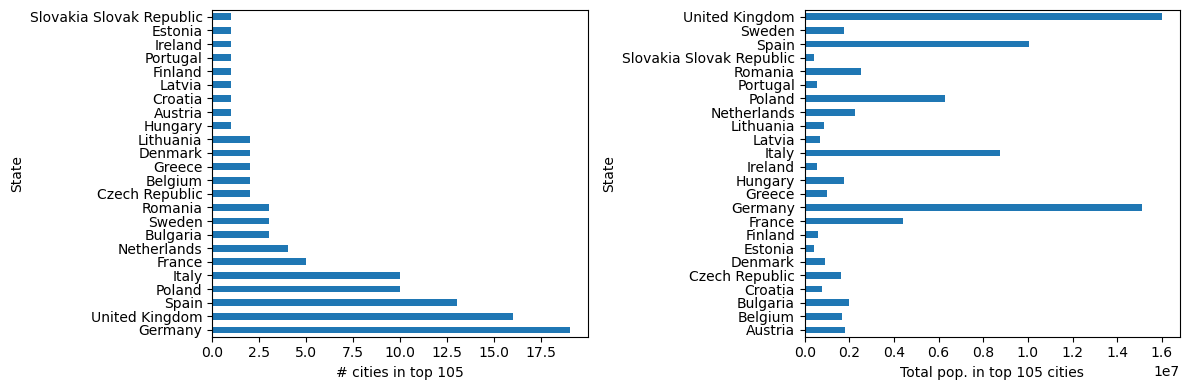

In [198]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
city_counts.plot(kind='barh', ax=ax1)  # 'barh' means horizontal bar plot
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")
plt.tight_layout()
plt.show()

## Dealing with Missing Data

Let's look at a simple data frame with missing data.

In [199]:
import io
data = ''' Name|Age|Color
           Ed|22|Red
           Sara|29|Blue
           Jason|24|
           Dan||Black'''

In [200]:
df = pd.read_table(io.StringIO(data), sep='|')

This data is missing some values:

In [201]:
df

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,NaN
3,Dan,NaN,Black


*Note: A few reasons why data can be missing. 1. User didn't enter data.  2. Storage devices out of space. 3. When integrating data systems, syncing is broken  etc*

**Finding missing data**:

In [202]:
df.isnull() # Just like numpy boolean array

,Name,Age,Color
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,False


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    Name   4 non-null      object 
 1   Age     3 non-null      float64
 2   Color   3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes


For larger datasets, we can use `.any` method:

In [205]:
df.isnull().any()

 Name    False
Age       True
Color     True
dtype: bool

**Dropping missing data**

Drop rows with missing data:

In [206]:
df.dropna()

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue


We can use the result of `.notnull` (the complement of `.isnull`) to be more selective.

In [207]:
valid = df.notnull()
#get rows for valid ages
df[valid.Age]

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,NaN


In [208]:
valid

,Name,Age,Color
0,True,True,True
1,True,True,True
2,True,True,False
3,True,False,True


In [209]:
#get rows for valid colors
df[valid.Color]

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
3,Dan,NaN,Black


**Inserting data for missing data**

In [210]:
df

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,NaN
3,Dan,NaN,Black


In [211]:
df.fillna('missing') # returns a copy, leaving original unchanged

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,missing
3,Dan,missing,Black


In [ ]:
df # Verify is unchanged

To fill values on per column basis, we can pass in a dictionary:

In [212]:
df.fillna({'Age': df.Age.median(), 'Color': 'Pink'})

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,Pink
3,Dan,24.0,Black


- *forward fill*: take the value before the missing value. 
- *backwards fill*: use the value after the missing value.

In [213]:
df

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,NaN
3,Dan,NaN,Black


In [215]:
df.ffill()

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,Blue
3,Dan,24.0,Black


In [216]:
df.bfill()

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,Black
3,Dan,NaN,Black


Another option is the `.interpolate` method with options (linear, time, values/index).

In [217]:
# add one more row to the data
data2 = ''' Name|Age|Color
           Greg|26|Red '''
df2 = pd.read_table(io.StringIO(data2), sep='|')
df2



,Name,Age,Color
0,Greg,26,Red


In [218]:
#df3 = df.append(df2, ignore_index=True) <--- no longer
df3 = pd.concat([df,df2], ignore_index=True)
df3

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,NaN
3,Dan,NaN,Black
4,Greg,26.0,Red


In [219]:
# can also do this
df3.loc[len(df3)] = ["Mary",20,"Green"]
df3

,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,NaN
3,Dan,NaN,Black
4,Greg,26.0,Red
5,Mary,20.0,Green


In [220]:
df3.interpolate()

/var/folders/z1/kyh0b3ss6rb546ncc72jgf0w0000gn/T/ipykernel_61915/1273901375.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df3.interpolate()


,Name,Age,Color
0,Ed,22.0,Red
1,Sara,29.0,Blue
2,Jason,24.0,NaN
3,Dan,25.0,Black
4,Greg,26.0,Red
5,Mary,20.0,Green


## References: 
- *Numerical Python: A Practical Techniques Approach for Industry*  by Robert Johansson (Chapter 12)
- *Learning the Pandas Library: Python Tools for Data Munging, Data Analysis, and Visualization* by Matt Harrison